# preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split,  KFold

In [2]:
import sklearn
print(sklearn.__version__)

1.3.2


In [3]:
%matplotlib inline

In [4]:
df_train = pd.read_csv("../data/train_new.csv")
print('Number of train records: {}'.format(len(df_train)))
df_train.head()

Number of train records: 60000


,rent_approval_date,town_0,town_1,town_2,town_3,town_4,block,street_name,flat_model,floor_area_sqm,...,flat_type_3-room,flat_type_4-room,flat_type_executive,flat_type_5-room,flat_type_2-room,central region,east region,north region,north-east region,west region
0,0.038835,0,0,0,0,1,2461.419769,2334.161163,2,67.0,...,1,0,0,0,0,0,0,0,0,1
1,0.504854,0,0,0,1,0,2371.483467,2341.480947,2,92.0,...,0,1,0,0,0,0,1,0,0,0
2,0.529126,0,0,0,1,1,2465.059892,2429.073831,7,67.0,...,1,0,0,0,0,1,0,0,0,0
3,0.033981,0,0,1,0,0,2419.540115,2635.040637,9,149.0,...,0,0,1,0,0,0,1,0,0,0
4,0.533981,0,0,1,0,1,2479.255239,2173.943626,7,68.0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
df_test = pd.read_csv("../data/test_new.csv")
print('Number of test records: {}'.format(len(df_test)))
df_test.head()

Number of test records: 30000


,rent_approval_date,town_0,town_1,town_2,town_3,town_4,block,street_name,flat_model,floor_area_sqm,...,flat_type_3-room,flat_type_4-room,flat_type_executive,flat_type_5-room,flat_type_2-room,central region,east region,north region,north-east region,west region
0,0.970874,1,0,1,1,1,2624.520690,2379.499974,7,121.0,...,0,0,0,1,0,0,0,0,1,0
1,0.524272,0,1,1,1,0,2524.058532,2615.882473,6,100.0,...,0,1,0,0,0,0,0,1,0,0
2,1.000000,0,1,1,0,0,2696.577167,2567.505982,2,91.0,...,0,1,0,0,0,0,0,0,0,1
3,0.033981,0,0,0,0,1,2515.834726,2821.948226,6,74.0,...,1,0,0,0,0,0,0,0,0,1
4,0.495146,0,0,0,0,1,2609.989756,2282.274343,7,121.0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
cols = ['rent_approval_date', 
        'town_0', 'town_1', 'town_2', 'town_3', 'town_4', #for binary encoding
#         'town', #for target encoding 
       'flat_model', 
       'floor_area_sqm', 
       'lease_commence_date',
       'avg_stock_price', 
        'num_shopping_malls', 
        'min_distance',
       'avg_coe_price', 
        'num_primary_schools', 
       'min_distance_planned',
       'flat_type_3-room', 'flat_type_4-room', 'flat_type_executive', 'flat_type_5-room', 'flat_type_2-room',
       'central region', 'east region', 'north region', 'north-east region', 'west region',
       'subzone', 
        'latitude', 'longitude', 
       # 'furnished', 'elevation',
        'planning_area_0' ,'planning_area_1' ,'planning_area_2' ,'planning_area_3' , 'planning_area_4', 
       # 'street_name', 
        'block'
       ]

y_train = df_train['monthly_rent'].values
X_train = df_train[cols]

X_test = df_test[cols].values

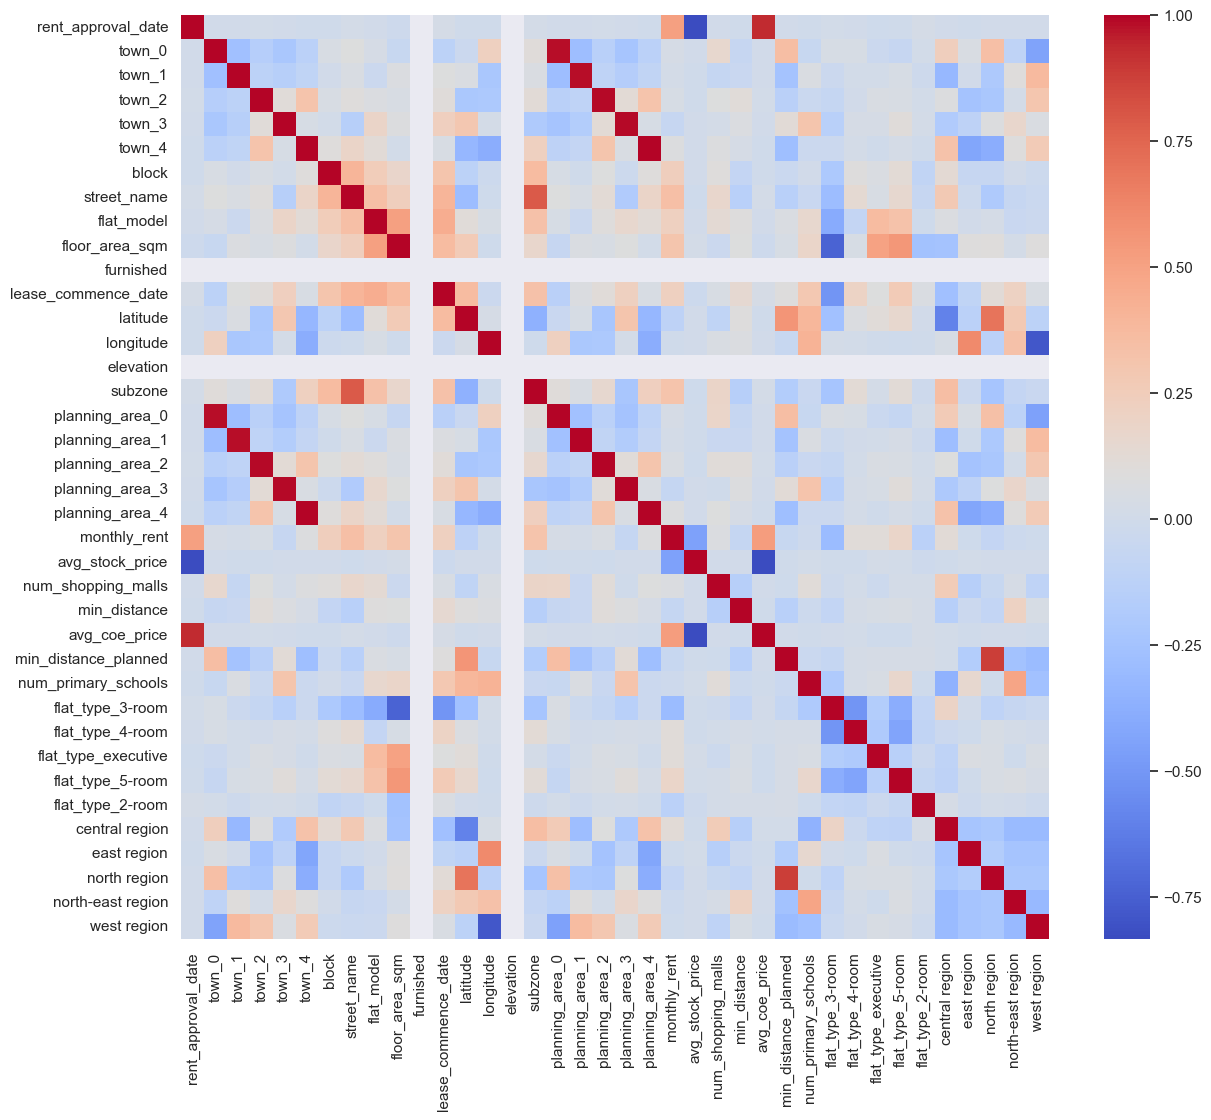

In [57]:
plt.figure(figsize=(14, 12))
sns.set()
ax = sns.heatmap(data = corr, cmap='coolwarm')
plt.show()

## PCA experiments

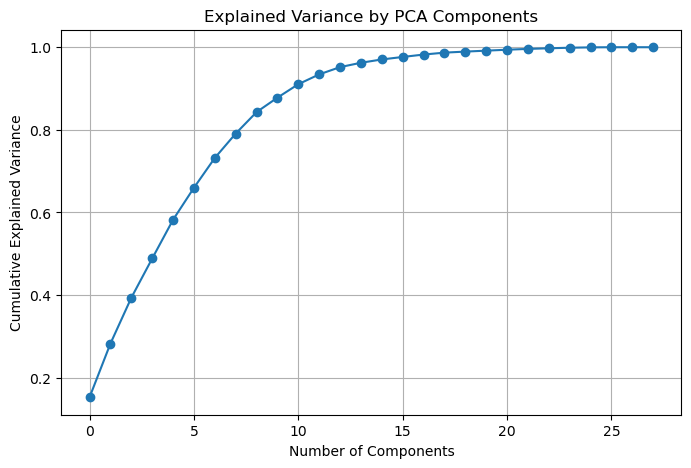

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA().fit(X_scaled)

# Calculate the cumulative sum of explained variance ratio
cumulative_var_ratio = pca.explained_variance_ratio_.cumsum()

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# define estimators

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

HGB_model = HistGradientBoostingRegressor( loss='gamma',
                                        learning_rate=0.13, 
                                        max_depth=None,
                                        max_bins=255,
                                        categorical_features=[],
                                        random_state=237,
                                        l2_regularization=2.9) 

XBG_model = XGBRegressor(objective ='reg:squarederror', alpha = 14, eta=0.11, max_depth=6, subsample=0.93)


lr_model =  Pipeline([
    ('scaler', MinMaxScaler()),  # Normalize the features
    ('regressor', LinearRegression()) 
])


svr_model =  make_pipeline(MinMaxScaler(), SVR())

knn_model = make_pipeline(MinMaxScaler(), 
                          PCA(n_components=0.9),
                          KNeighborsRegressor(n_neighbors=23))


rf_model = RandomForestRegressor()

columns_to_drop = ['avg_stock_price', 'floor_area_sqm']
HGB_model = make_pipeline(ColumnTransformer(
                                transformers=[
                                ('drop_columns', 'drop', columns_to_drop),
                                ],
                                remainder='passthrough'  # This means all columns not specified in the transformers list will be passed through without changes
                                ),

    HistGradientBoostingRegressor( loss='gamma',
                                learning_rate=0.13, 
                                max_depth=None,
                                max_bins=255,
                                categorical_features=[],
                                random_state=237,
                                l2_regularization=2.9))


In [8]:
HGB_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['avg_stock_price',
                                                   'floor_area_sqm'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[],
                                               l2_regularization=2.9,
                                               learning_rate=0.13, loss='gamma',
                                               random_state=237))])

In [9]:
y_pred = HGB_model.predict(X_test)
df = pd.DataFrame(y_pred, columns =['Predicted'], dtype = float) 
df.head()
df.to_csv("../data/HGB_output.csv", index_label='Id')

# tune random forest 

## try with default random forest estimator

In [35]:
%%time
scores = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')


In [37]:
print('MAE: %.3f (%.3f)' % (np.mean(-scores), np.std(scores)))

MAE: 387.902 (2.319)


In [20]:
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
df = pd.DataFrame(y_pred, columns =['Predicted'], dtype = float) 
df.to_csv("../data/tuned_rf_output.csv", index_label='Id')

## tuning hyperparameter with grid search

In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 8],
}

# Initialize the random forest
rf = RandomForestRegressor(random_state=42)

# Initialize the Random Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_dist, cv=5, n_jobs=-1, verbose=2)

In [22]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=400; total time= 2.7min


/Users/saotekf/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=400; total time= 2.7min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=400; total time= 2.8min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300; total time= 2.0min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=400; total time= 2.7min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300; total time= 2.0min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=400; total time= 2.8min
[CV] END max_depth=None, max_features=auto, min_samples_split=5, n_estimators=200; total time= 1.2min
[CV] END max_depth=None, max_features=auto, min_samples_split=5, n_estimators=400;

[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=  23.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=  31.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200; total time=  42.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200; total time=  48.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400; total time= 1.5min
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=300; total time= 1.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   8.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   8

[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=  29.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=  16.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=  16.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=  24.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=200; total time=  15.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=  23.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=  42.7s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200; total time=  43.4s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300; total t

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

[CV] END max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300; total time= 1.7min
[CV] END max_depth=30, max_features=auto, min_samples_split=8, n_estimators=400; total time= 2.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=  23.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=200; total time=  14.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=  22.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=  22.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=  21.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=  27.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=200; total time=  14.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=  27.1s


In [71]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}


In [10]:
# best_params = random_search.best_params_
best_params = {'n_estimators': 300,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 10}
best_rf_model = RandomForestRegressor(**best_params)

In [81]:
%%time
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('tuned random forestMAE: %.3f (%.3f)' % (np.mean(-scores), np.std(scores)))

tuned random forestMAE: 372.797 (3.175)
CPU times: user 45.1 s, sys: 212 ms, total: 45.4 s
Wall time: 45.4 s


In [11]:

best_rf_model .fit(X_train, y_train)
feature_importances_1 = best_rf_model.feature_importances_

rf.fit(X_train, y_train)
feature_importances_2 = rf.feature_importances_

feature_importances = (feature_importances_1 + feature_importances_2)/2

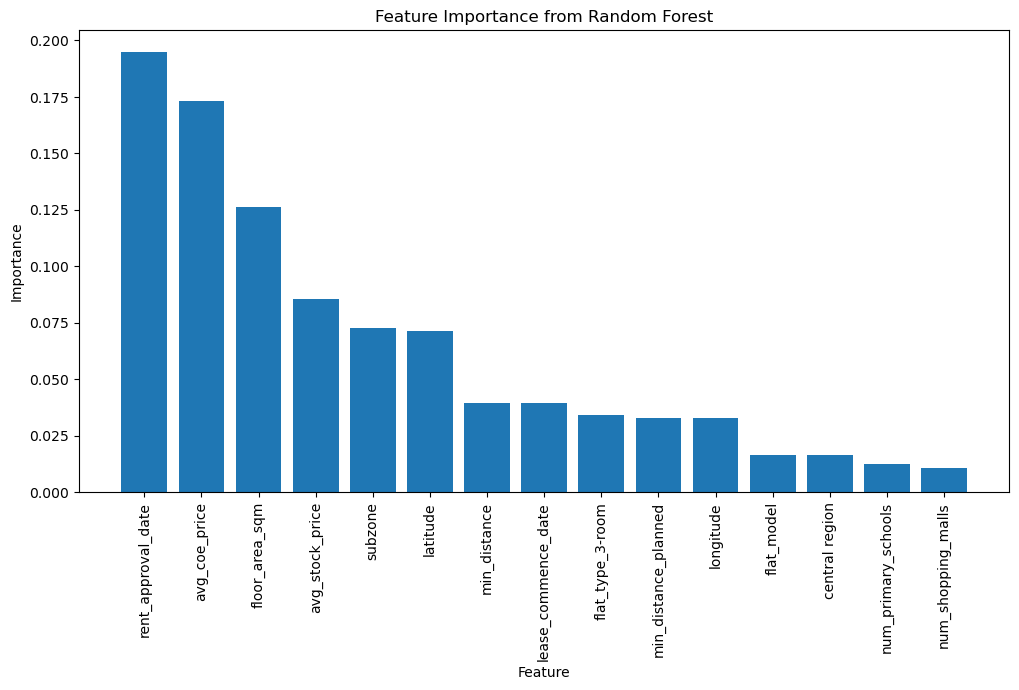

In [29]:
sorted_idx = np.argsort(feature_importances)[::-1]
l = 15
feature_names = np.array(cols)
plt.figure(figsize=(12, 6))
plt.bar(range(l), feature_importances[sorted_idx][:l], align='center')
plt.xticks(range(l), feature_names[sorted_idx][:l], rotation=90)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## KNN with PCA

In [21]:
from sklearn.manifold import TSNE

knn_model_with_no_pca = make_pipeline(MinMaxScaler(), 
                          KNeighborsRegressor(n_neighbors=23))

knn_model = make_pipeline(MinMaxScaler(), 
                          PCA(n_components=0.95),
                          KNeighborsRegressor(n_neighbors=23))


In [52]:
%%time
scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('KNN MAE: %.3f (%.3f)' % (np.mean(-scores), np.std(scores)))

KNN MAE: 398.006 (3.590)
CPU times: user 5.09 s, sys: 1.01 s, total: 6.1 s
Wall time: 827 ms


In [28]:
%%time 
knn_model.fit(X_train, y_train)

CPU times: user 420 ms, sys: 133 ms, total: 553 ms
Wall time: 117 ms


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=23))])

In [46]:
%%time
scores = cross_val_score(knn_model_with_no_pca, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('KNN MAE: %.3f (%.3f)' % (np.mean(-scores), np.std(scores)))

KNN MAE: 397.107 (2.892)
CPU times: user 1min 14s, sys: 34.3 s, total: 1min 48s
Wall time: 41.8 s


# build stack regressor

In [23]:
estimators = [
    ('lr', lr_model),
    ('rf', best_rf_model),
    ('Knn',knn_model),
    ('hgb', HGB_model),
]


stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

In [49]:
%%time
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold CV
scores = cross_val_score(stacking_regressor, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

CPU times: user 6min 26s, sys: 25.7 s, total: 6min 52s
Wall time: 4min 11s


In [50]:
print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: -366.927 (1.154)


In [24]:
%%time
stacking_regressor.fit(X_train, y_train)

CPU times: user 1min 34s, sys: 6.09 s, total: 1min 40s
Wall time: 1min 2s


StackingRegressor(estimators=[('lr',
                               Pipeline(steps=[('scaler', MinMaxScaler()),
                                               ('regressor',
                                                LinearRegression())])),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=300)),
                              ('Knn',
                               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                               ('pca', PCA(n_components=0.95)),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(n_neigh...
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(remainder='passthrough',
                                                                  transformers=[('drop_columns',
                                                                                 'drop',
                                                                                 ['avg_stock_price',
                                                                                  'floor_area_sqm'])])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(categorical_features=[],
                                                                              l2_regularization=2.9,
                                                                              learning_rate=0.13,
                                                                              loss='gamma',
                                                                              random_state=237))]))],
                  final_estimator=LinearRegression())

In [13]:
%%time
y_pred = stacking_regressor.predict(X_test)


/Users/saotekf/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/saotekf/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/saotekf/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


CPU times: user 2.94 s, sys: 571 ms, total: 3.52 s
Wall time: 774 ms


In [14]:
df = pd.DataFrame(y_pred, columns =['Predicted'], dtype = float) 
df.head()
df.to_csv("../data/stack_output.csv", index_label='Id')

In [20]:
# lr rf knn gb
meta_coef = stacking_regressor.final_estimator_.coef_
print(meta_coef)

[0.07659294 0.14839725 0.03308161 0.76622728]


In [37]:
meta_coef

array([0.10933543, 0.1739686 , 0.00179295, 0.73036717])

In [16]:
df.head()

,Predicted
0,3216.204470
1,2774.404477
2,3538.076467
3,1960.922080
4,2683.046471
